IMPORT NECESARY LIBRARIES

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [25]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

DATA CLEANING

In [26]:
#Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [27]:
#Drop customerID column
df.drop("customerID", axis = 1, inplace = True)

In [28]:
#Seperate categorical and numeric columns
cat_cols = df.select_dtypes(include =["object"]).columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [29]:
#One_hot encode categorical columns
df_encoded = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [30]:
#Save processed dataset
df_encoded.to_csv("processed_telco_churn.csv", index=False)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


MODEL TRAINING

In [32]:
#Load Processed data
df = pd.read_csv("processed_telco_churn.csv")

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [33]:
#Seperate features and target variable
#Traget variable (Churn 1 = Yes, 0 = No)

#Traget column
target = "Churn_Yes"

#features
X = df.drop(target , axis = 1)
y = df[target]

In [34]:
#Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42, stratify = y)

In [35]:
#Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Train Logistic Regression
log_model = LogisticRegression(max_iter=2000)
#fit the model
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [37]:
print("Logistic Regression (Scaled) ")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression (Scaled) 
Accuracy: 0.8069552874378992

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [38]:
#Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200,random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [39]:
#Evaluate Random Forest
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.7899219304471257

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.63      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



EVALUATION AND VISUALIZATION

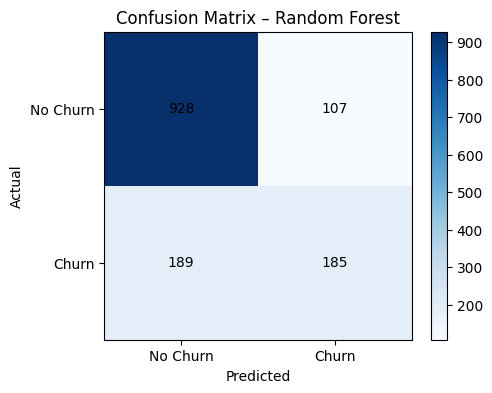

In [40]:
#Confusion matrix (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.colorbar()

#Labels
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["No Churn", "Churn"])
plt.yticks(tick_marks, ["No Churn", "Churn"])

plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add numbers inside squares
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.show()

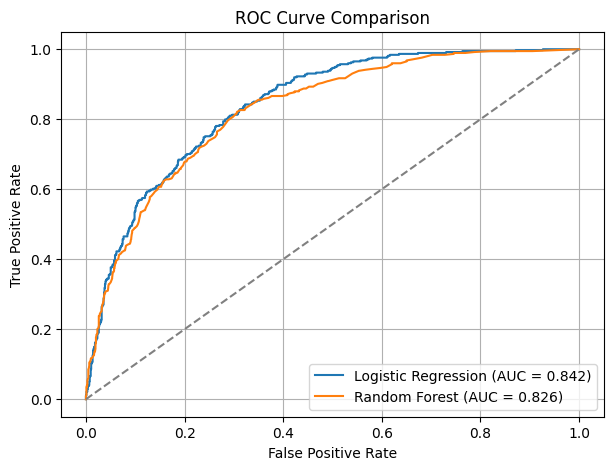

In [41]:
#ROC Curve (To compare Logistic Regression and Random Forest)
from sklearn.metrics import roc_curve, roc_auc_score

#Probabilities for ROC AUC
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7, 5))

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


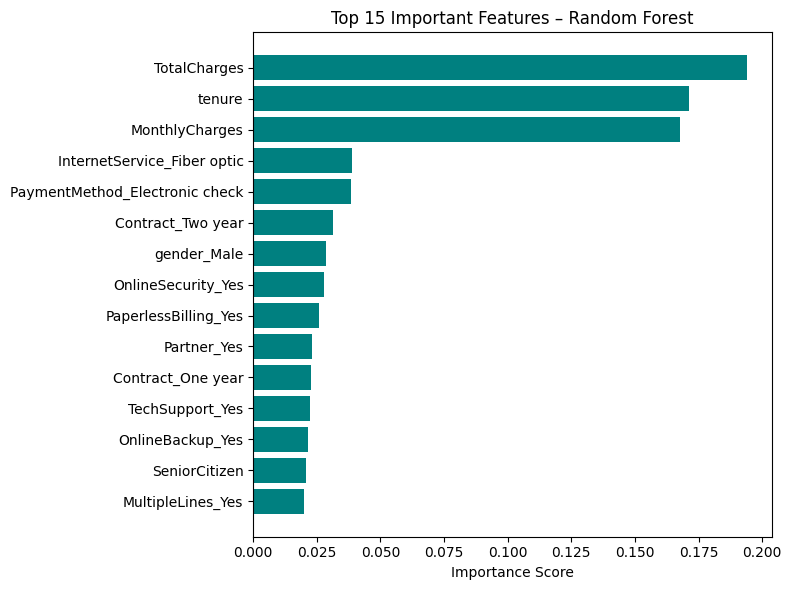

In [42]:
#Feature importance (Random Forest)

importances = rf_model.feature_importances_

# Get top 15 features
indices = np.argsort(importances)[-15:]
top_features = X.columns[indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], color="teal")
plt.yticks(range(len(indices)), top_features)
plt.xlabel("Importance Score")
plt.title("Top 15 Important Features – Random Forest")
plt.tight_layout()
plt.show()


SAVING RESULTS FOR POWER BI

In [43]:
# Create a result DataFrame based on the test set
results_df = X_test.copy()

results_df["actual_churn"] = y_test.values
results_df["predicted_churn"] = y_pred_rf
results_df["predicted_prob_churn"] = y_prob_rf

# Save to CSV
results_df.to_csv("churn_model_results.csv", index=False)

print("Saved: churn_model_results.csv")


Saved: churn_model_results.csv


SAVE TRAINED MODELS

In [44]:
import joblib
import os

os.makedirs("models", exist_ok=True)

# Save models and scaler
joblib.dump(log_model, "models/logistic_regression_model.pkl")
joblib.dump(rf_model, "models/random_forest_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("Models saved in the 'models' folder.")


Models saved in the 'models' folder.


GITHUB PROJECT FOLDERS CREATED

In [45]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("notebooks", exist_ok=True)

print("Project folders created: data/, notebooks/")


Project folders created: data/, notebooks/
